In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [26]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [28]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [32]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

# FC Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))  # Assuming 43 classes


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                      

In [35]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3)

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[early_stop, reduce_lr])
model.save('traffic_sign_model.h5')

Epoch 1/50
981/981 [==============================] - 17s 17ms/step - loss: 0.7603 - accuracy: 0.7996 - val_loss: 0.1395 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 2/50
981/981 [==============================] - 16s 16ms/step - loss: 0.1402 - accuracy: 0.9595 - val_loss: 0.0868 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 3/50
981/981 [==============================] - 15s 16ms/step - loss: 0.0994 - accuracy: 0.9725 - val_loss: 0.0425 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 4/50
981/981 [==============================] - 15s 16ms/step - loss: 0.0886 - accuracy: 0.9785 - val_loss: 0.0352 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 5/50
981/981 [==============================] - 15s 16ms/step - loss: 0.0749 - accuracy: 0.9814 - val_loss: 0.0344 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 6/50
981/981 [==============================] - 16s 17ms/step - loss: 0.0754 - accuracy: 0.9821 - val_loss: 0.0328 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 7/50
981/981 [==============================] - 16s 

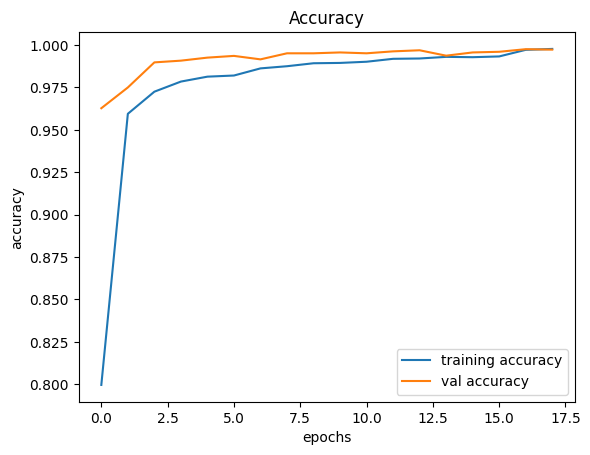

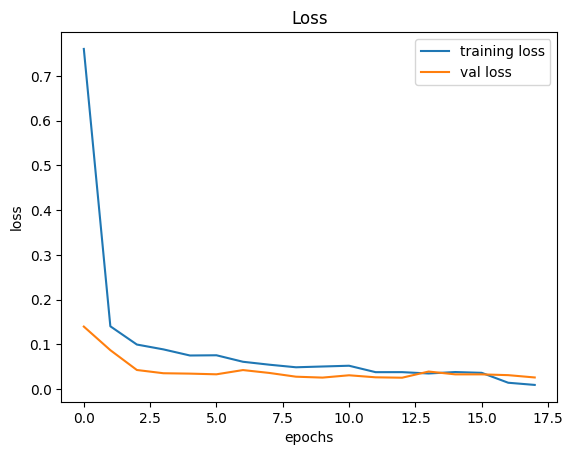

In [37]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [38]:
# Loading the saved model
from keras.models import load_model
model = load_model('traffic_sign_model.h5')

In [ ]:
from sklearn.metrics import accuracy_score
# Load test labels and image paths
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
# Preprocess images
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30)) 
    data.append(np.array(image))
X_test = np.array(data)
# Make predictions
pred_probs = model.predict(X_test)       
pred = np.argmax(pred_probs, axis=1)        
# Calculate accuracy
print("Test Accuracy:", accuracy_score(labels, pred))



395/395 [==============================] - 2s 4ms/step
Test Accuracy: 0.971021377672209


In [ ]:
from keras.models import load_model
from PIL import Image
import numpy as np

# Load the trained model
model = load_model('my_model.h5')  # or folder path if SavedModel format

# Load and preprocess the image
img_path = 'Train/1/00001_00000_00001.png'  # Change to your image path
image = Image.open(img_path)
image = image.resize((30, 30))          
image = np.array(image)
image = np.expand_dims(image, axis=0)
# Predict
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

print("Predicted Class ID:", predicted_class)


1/1 [==============================] - 0s 123ms/step
Predicted Class ID: 1
